### Import that Pandas package.  We will use to hold the results of the queries, print Pandas tables, and print simple data visualizations.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Overall Recommendations

1) aonjhka
2) jalnskn
3) absdjkb

- What are the 5 most popular trips that you would call "commuter trips"?

- What are your recommendations for offers (justify based on your findings)?

## 1) What is the number of trips taken by month? By day? What is the average trip duration by month, by day?

# Getting trips taken by month

In [9]:
%%bigquery 

# By Month
SELECT EXTRACT(MONTH FROM start_date) as Month, 
count(distinct trip_id) as num_trips, 
round(100*count(distinct trip_id)/983648,2) as percent_trips, 
round(avg(duration_sec/60),2) as avg_duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (round(duration_sec/3600/24) < 7) 
group by month
order by MONTH

Downloading: 100%|██████████| 12/12 [00:01<00:00,  8.54rows/s]


,Month,num_trips,percent_trips,avg_duration_min
0,1,71787,7.30,15.02
1,2,69983,7.11,15.39
2,3,81777,8.31,15.91
3,4,84194,8.56,15.45
4,5,86361,8.78,16.25
5,6,91670,9.32,16.47
6,7,89537,9.10,16.96
7,8,95576,9.72,16.95
8,9,87320,8.88,18.97
9,10,94377,9.59,16.66


In [6]:
%%bigquery monthly_subscriber_trips_df

# By Month
SELECT EXTRACT(MONTH FROM start_date) as Month, 
count(distinct trip_id) as num_trips, 
round(100*count(distinct trip_id)/983648,2) as percent_trips, 
round(avg(duration_sec/60),2) as avg_duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (round(duration_sec/3600/24) < 7) and (subscriber_type = "Subscriber")
group by month
order by MONTH

Downloading: 100%|██████████| 12/12 [00:01<00:00,  7.93rows/s]


In [10]:
%%bigquery monthly_customer_trips_df

# By Month
SELECT EXTRACT(MONTH FROM start_date) as Month, 
count(distinct trip_id) as num_trips, 
round(100*count(distinct trip_id)/983648,2) as percent_trips, 
round(avg(duration_sec/60),2) as avg_duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (round(duration_sec/3600/24) < 7) and (subscriber_type = "Customer")
group by month
order by MONTH

Downloading: 100%|██████████| 12/12 [00:01<00:00,  8.62rows/s]


In [12]:
display(monthly_subscriber_trips_df)
display(monthly_customer_trips_df)

,Month,num_trips,percent_trips,avg_duration_min
0,1,64075,6.51,9.66
1,2,62123,6.32,9.40
2,3,71619,7.28,9.57
3,4,74218,7.55,9.58
4,5,73622,7.48,9.33
5,6,79524,8.08,9.66
6,7,76387,7.77,9.49
7,8,80033,8.14,9.43
8,9,70011,7.12,9.95
9,10,80340,8.17,9.76


,Month,num_trips,percent_trips,avg_duration_min
0,1,7712,0.78,59.54
1,2,7860,0.80,62.77
2,3,10158,1.03,60.57
3,4,9976,1.01,59.15
4,5,12739,1.30,56.23
5,6,12146,1.23,61.06
6,7,13150,1.34,60.35
7,8,15543,1.58,55.68
8,9,17309,1.76,55.45
9,10,14037,1.43,56.19


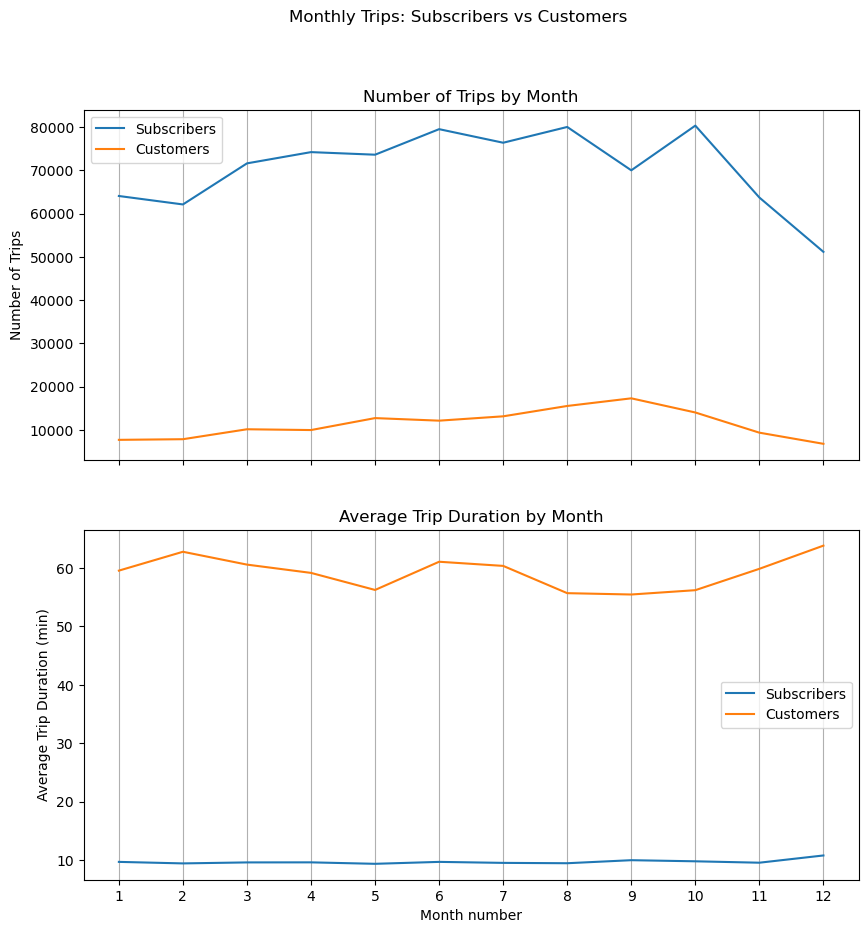

In [69]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Monthly Trips: Subscribers vs Customers')

sns.lineplot(ax=axes[0], x = list(range(1, monthly_subscriber_trips_df.shape[0] + 1)), y=monthly_subscriber_trips_df["num_trips"], label = 'Subscribers')
sns.lineplot(ax=axes[0], x = list(range(1, monthly_customer_trips_df.shape[0] + 1)), y=monthly_customer_trips_df["num_trips"], label = 'Customers')
axes[0].set_title('Number of Trips by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Trips')
axes[0].legend()

sns.lineplot(ax=axes[1], x = list(range(1, monthly_subscriber_trips_df.shape[0] + 1)), y=monthly_subscriber_trips_df["avg_duration_min"], label = 'Subscribers')
sns.lineplot(ax=axes[1], x = list(range(1, monthly_customer_trips_df.shape[0] + 1)), y=monthly_customer_trips_df["avg_duration_min"], label = 'Customers')
axes[1].set_xlabel('Month number')
axes[1].xaxis.set_ticks(np.arange(1, 13, 1))
axes[1].set_title('Average Trip Duration by Month')
axes[1].set_ylabel('Average Trip Duration (min)')
axes[1].legend()

axes[0].grid(axis = 'x')
axes[1].grid(axis = 'x')

**Write up for above plot**

In [25]:
%%bigquery yearAndMonth_subscriber_trips_df

# By Month
SELECT EXTRACT(MONTH FROM start_date) as month,
EXTRACT(YEAR FROM start_date) as year,
count(distinct trip_id) as num_trips, 
round(100*count(distinct trip_id)/983648,2) as percent_trips, 
round(avg(duration_sec/60),2) as avg_duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (round(duration_sec/3600/24) < 7) and (subscriber_type = "Subscriber")
group by year, month
order by year, month

Downloading: 100%|██████████| 37/37 [00:01<00:00, 20.23rows/s]


In [37]:
%%bigquery yearAndMonth_customer_trips_df

# By Month
SELECT EXTRACT(MONTH FROM start_date) as month,
EXTRACT(YEAR FROM start_date) as year,
count(distinct trip_id) as num_trips, 
round(100*count(distinct trip_id)/983648,2) as percent_trips, 
round(avg(duration_sec/60),2) as avg_duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (round(duration_sec/3600/24) < 7) and (subscriber_type = "Customer")
group by year, month
order by year, month

Downloading: 100%|██████████| 37/37 [00:01<00:00, 26.19rows/s]


In [38]:
# add a column to get the datetime 
# reference: https://cmdlinetips.com/2021/02/combine-year-month-and-day-columns-to-single-date-in-pandas/

cols=["year","month"]
yearAndMonth_subscriber_trips_df['date'] = yearAndMonth_subscriber_trips_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# yearAndMonth_subscriber_trips_df['date']=pd.to_datetime(yearAndMonth_subscriber_trips_df['date']) # Convert column to datetime if wanted

display(yearAndMonth_subscriber_trips_df)

yearAndMonth_customer_trips_df['date'] = yearAndMonth_customer_trips_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# yearAndMonth_customer_trips_df['date']=pd.to_datetime(yearAndMonth_customer_trips_df['date']) # Convert column to datetime if wanted

display(yearAndMonth_customer_trips_df)


,month,year,num_trips,percent_trips,avg_duration_min,date
0,8,2013,929,0.09,14.88,2013-8
1,9,2013,15767,1.60,10.47,2013-9
2,10,2013,22979,2.34,9.79,2013-10
3,11,2013,19730,2.01,9.71,2013-11
4,12,2013,16658,1.69,9.46,2013-12
5,1,2014,21018,2.14,9.44,2014-1
6,2,2014,16565,1.68,9.39,2014-2
7,3,2014,20584,2.09,9.56,2014-3
8,4,2014,22138,2.25,9.69,2014-4
9,5,2014,23377,2.38,9.35,2014-5


,month,year,num_trips,percent_trips,avg_duration_min,date
0,8,2013,1173,0.12,65.51,2013-8
1,9,2013,9475,0.96,51.60,2013-9
2,10,2013,6126,0.62,57.65,2013-10
3,11,2013,4488,0.46,66.25,2013-11
4,12,2013,3235,0.33,64.23,2013-12
5,1,2014,3409,0.35,60.02,2014-1
6,2,2014,2459,0.25,71.84,2014-2
7,3,2014,4009,0.41,67.63,2014-3
8,4,2014,4082,0.41,63.43,2014-4
9,5,2014,5125,0.52,62.57,2014-5


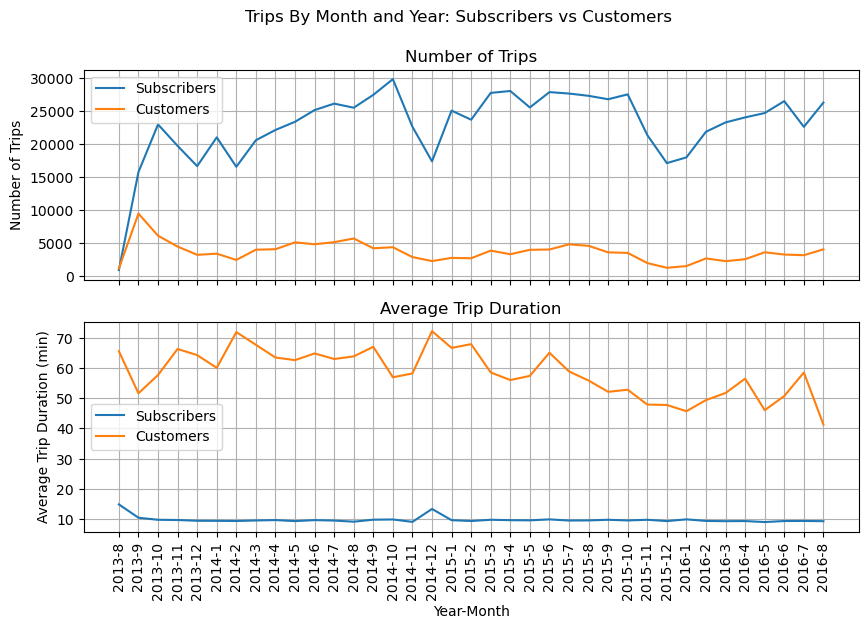

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
fig.suptitle('Trips By Month and Year: Subscribers vs Customers')

sns.lineplot(ax=axes[0], x = yearAndMonth_subscriber_trips_df['date'], y=yearAndMonth_subscriber_trips_df["num_trips"], label = 'Subscribers')
sns.lineplot(ax=axes[0], x = yearAndMonth_customer_trips_df['date'], y=yearAndMonth_customer_trips_df["num_trips"], label = 'Customers')
axes[0].set_title('Number of Trips')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Number of Trips')
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].legend()

sns.lineplot(ax=axes[1], x = yearAndMonth_subscriber_trips_df['date'], y=yearAndMonth_subscriber_trips_df["avg_duration_min"], label = 'Subscribers')
sns.lineplot(ax=axes[1], x = yearAndMonth_customer_trips_df['date'], y=yearAndMonth_customer_trips_df["avg_duration_min"], label = 'Customers')
axes[1].set_xlabel('Year-Month')
axes[1].set_title('Average Trip Duration')
axes[1].set_ylabel('Average Trip Duration (min)')
# axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend()

plt.xticks(rotation=90);
axes[0].grid()
axes[1].grid()

**Write up for above plot**

# Getting trips taken by day

In [70]:
%%bigquery weekly_trips_sub_df

# By DOW, subscribers
SELECT EXTRACT(DAYOFWEEK FROM start_date) as Day, count(distinct trip_id) as num_trips, round(100*count(distinct trip_id)/983648,2) as percent_trips, round(avg(duration_sec/60),2) as avg_duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (round(duration_sec/3600/24) < 7) and (subscriber_type = "Subscriber")
group by Day
order by Day

Downloading: 100%|██████████| 7/7 [00:01<00:00,  4.18rows/s]


In [72]:
%%bigquery weekly_trips_cus_df

# By DOW, customers
SELECT EXTRACT(DAYOFWEEK FROM start_date) as Day, count(distinct trip_id) as num_trips, round(100*count(distinct trip_id)/983648,2) as percent_trips, round(avg(duration_sec/60),2) as avg_duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (round(duration_sec/3600/24) < 7) and (subscriber_type = "Customer")
group by Day
order by Day

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.06rows/s]


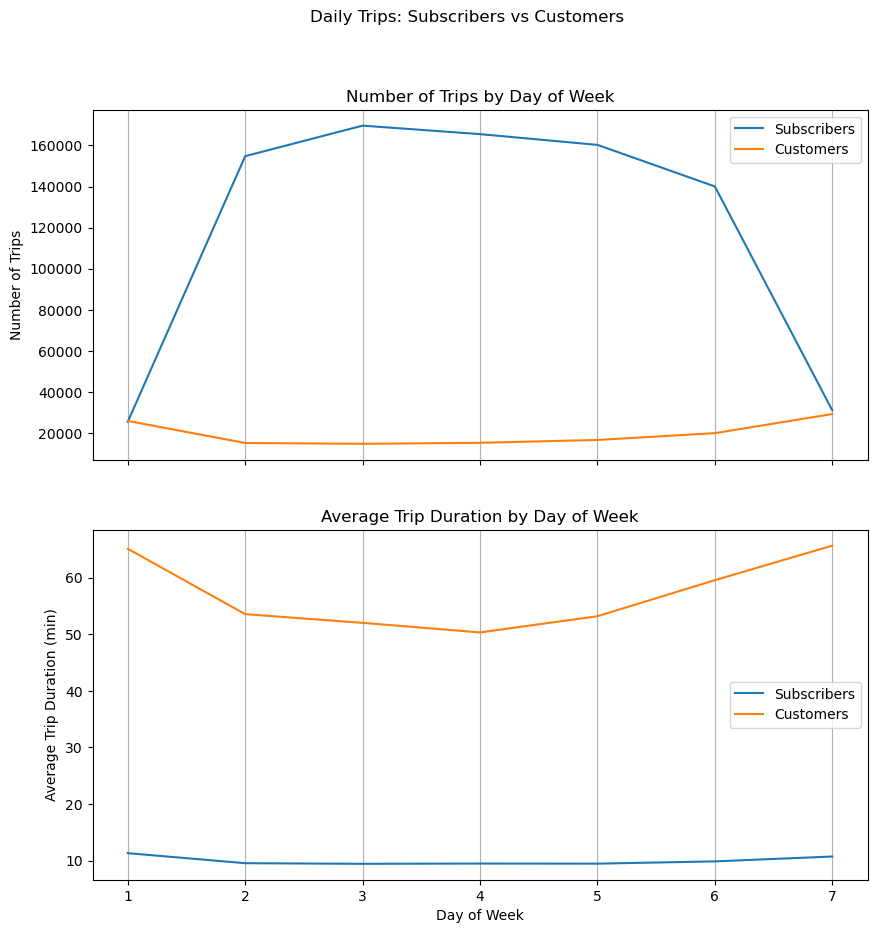

In [75]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Daily Trips: Subscribers vs Customers')

sns.lineplot(ax=axes[0], x = list(range(1, weekly_trips_sub_df.shape[0] + 1)), y=weekly_trips_sub_df["num_trips"], label = 'Subscribers')
sns.lineplot(ax=axes[0], x = list(range(1, weekly_trips_cus_df.shape[0] + 1)), y=weekly_trips_cus_df["num_trips"], label = 'Customers')
axes[0].set_title('Number of Trips by Day of Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Number of Trips')
axes[0].legend()

sns.lineplot(ax=axes[1], x = list(range(1, weekly_trips_sub_df.shape[0] + 1)), y=weekly_trips_sub_df["avg_duration_min"], label = 'Subscribers')
sns.lineplot(ax=axes[1], x = list(range(1, weekly_trips_cus_df.shape[0] + 1)), y=weekly_trips_cus_df["avg_duration_min"], label = 'Customers')
axes[1].set_xlabel('Day of Week')
axes[1].xaxis.set_ticks(np.arange(1, 8, 1))
axes[1].set_title('Average Trip Duration by Day of Week')
axes[1].set_ylabel('Average Trip Duration (min)')
axes[1].legend()

axes[0].grid(axis = 'x')
axes[1].grid(axis = 'x')

## Getting trips taken by hour

In [76]:
%%bigquery hourly_trips_sub_df

# by hour, subscribers
SELECT EXTRACT(HOUR FROM start_date) as hour, count(distinct trip_id) as num_trips, round(100*count(distinct trip_id)/983648,2) as percent_trips, round(avg(duration_sec/60),2) as avg_duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (round(duration_sec/3600/24) < 7) and (subscriber_type = "Subscriber")
group by hour
order by hour

Downloading: 100%|██████████| 24/24 [00:01<00:00, 20.50rows/s]


In [77]:
%%bigquery hourly_trips_cus_df

# by hour, customers
SELECT EXTRACT(HOUR FROM start_date) as hour, count(distinct trip_id) as num_trips, round(100*count(distinct trip_id)/983648,2) as percent_trips, round(avg(duration_sec/60),2) as avg_duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (round(duration_sec/3600/24) < 7) and (subscriber_type = "Customer")
group by hour
order by hour

Downloading: 100%|██████████| 24/24 [00:01<00:00, 16.43rows/s]


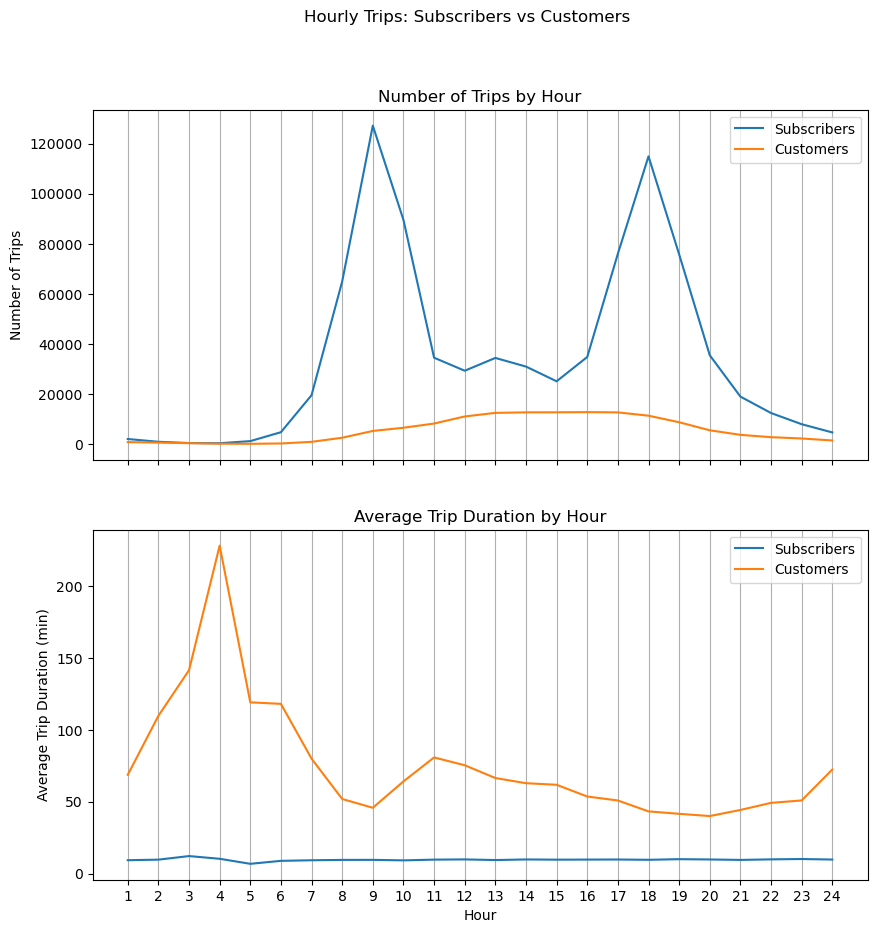

In [80]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Hourly Trips: Subscribers vs Customers')

sns.lineplot(ax=axes[0], x = list(range(1, hourly_trips_sub_df.shape[0] + 1)), y=hourly_trips_sub_df["num_trips"], label = 'Subscribers')
sns.lineplot(ax=axes[0], x = list(range(1, hourly_trips_cus_df.shape[0] + 1)), y=hourly_trips_cus_df["num_trips"], label = 'Customers')
axes[0].set_title('Number of Trips by Hour')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Number of Trips')
axes[0].legend()

sns.lineplot(ax=axes[1], x = list(range(1, hourly_trips_sub_df.shape[0] + 1)), y=hourly_trips_sub_df["avg_duration_min"], label = 'Subscribers')
sns.lineplot(ax=axes[1], x = list(range(1, hourly_trips_cus_df.shape[0] + 1)), y=hourly_trips_cus_df["avg_duration_min"], label = 'Customers')
axes[1].set_xlabel('Hour')
axes[1].xaxis.set_ticks(np.arange(1, 25, 1))
axes[1].set_title('Average Trip Duration by Hour')
axes[1].set_ylabel('Average Trip Duration (min)')
axes[1].legend()

axes[0].grid(axis = 'x')
axes[1].grid(axis = 'x')

### In the next cell, we run a bq using the bang to shell out to linux

In [2]:
! bq query --use_legacy_sql=FALSE 'SELECT start_station_name, end_station_name, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5'

Waiting on bqjob_racb2c3ce524e27a_00000179caa00c71_1 ... (0s) Current status: DONE   
+-----------------------------------------+--------------------------------------+-----------+
|           start_station_name            |           end_station_name           | trip_freq |
+-----------------------------------------+--------------------------------------+-----------+
| Harry Bridges Plaza (Ferry Building)    | Embarcadero at Sansome               |      9150 |
| San Francisco Caltrain 2 (330 Townsend) | Townsend at 7th                      |      8508 |
| 2nd at Townsend                         | Harry Bridges Plaza (Ferry Building) |      7620 |
| Harry Bridges Plaza (Ferry Building)    | 2nd at Townsend                      |      6888 |
| Embarcadero at Sansome                  | Steuart at Market                    |      6874 |
+-----------------------------------------+--------------------------------------+-----------+


### In the next cell, we add the command line options:

--format=csv which formats it into comma separated value

\> result.csv which writes the output to a file

this allows us to read the file back into pandas

If you have more than 100 rows, you may want to use the max_rows parameter like this:

--max_rows=1000000

In [3]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5' > result.csv

Waiting on bqjob_r7a62677ffc3ca3bc_00000179caa03917_1 ... (0s) Current status: DONE   


### Read the data from the file into Pandas and create a simple data visualization

In [4]:
pop_trips = pd.read_csv('result.csv')

In [5]:
pop_trips

,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


<AxesSubplot:>

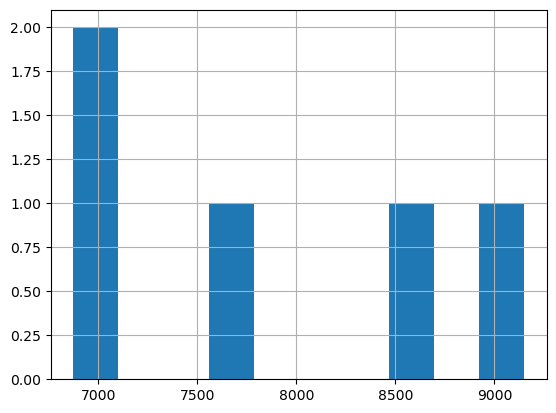

In [6]:
pop_trips.trip_freq.hist()

### We can also use the magic commands to run  BigQuery SQL


#### This runs the query above and prints to the notebook output

In [8]:
%%bigquery

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.24rows/s]


,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


#### This next magic command saves it into a Pandas data frame

In [9]:
%%bigquery my_panda_data_frame

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.79rows/s]


In [10]:
my_panda_data_frame

,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


<AxesSubplot:>

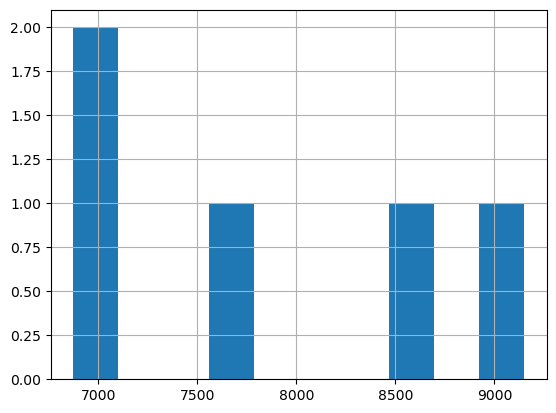

In [11]:
my_panda_data_frame.trip_freq.hist()

In [1]:
%%bigquery commuter_trips_temp

WITH base_tbl_tripsByWeekday AS (
    SELECT
    *, EXTRACT(DAYOFWEEK FROM start_date) as DOW, EXTRACT(HOUR FROM start_date) as starting_hour, EXTRACT(HOUR FROM end_date) as ending_hour
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
    WHERE EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6
)
SELECT start_station_name, end_station_name, count(distinct trip_id) as num_trips, avg(starting_hour) as average_starting_hour
FROM base_tbl_tripsByWeekday
WHERE (starting_hour BETWEEN 6 AND 9) OR (starting_hour BETWEEN 16 AND 19)
group by start_station_name, end_station_name 
order by (num_trips) DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.81rows/s]


In [4]:
commuter_trips_temp.describe()

,num_trips,average_starting_hour
count,5.000000,5.000000
mean,5370.600000,12.505422
std,269.735611,2.647674
min,5087.000000,9.184329
25%,5164.000000,11.155888
50%,5322.000000,11.764849
75%,5539.000000,15.190550
max,5741.000000,15.231492
